# 第二章  矩阵

In [16]:
EPSILON = 1e-8

In [35]:
class Vector:
    def __init__(self, lst):
        
        self._values = list(lst)
        
    def __getitem__(self, index):
        return self._values[index]
    
    def __repr__(self):
        return 'Vector({})'.format(self._values)
    
    def __len__(self):
        return len(self._values)
    
    def __add__(self, another):
        assert len(self) == len(another), \
        "Error in adding. Length of vectors must be same. "
        return Vector([a + b for a, b in zip(self, another)])
    
    def underlying_list(self):
        return self._values
    
    def __sub__(self, another):
        assert len(self) == len(another), \
        "Error in subing. Length of vectors must be same. "
        return Vector([a - b for a, b in zip(self, another)])
    
    def __mul__(self, k):
        return Vector([k*e for e in self])
    
    def __rmul__(self, k):
        return self * k
    
    def __truediv__(self, k):
        return (1/k)*self 
    
    def __pos__(self):
        return 1 * self
        
    def __neg__(self):
        return -1 * self
    
    def __iter__(self):
        return self._values.__iter__()
    
    def __str__(self):
        return '({})'.format(', '.join(str(e) for e in self._values))
    
    @classmethod
    def zero(cls, dim):
        return cls([0] * dim)
    
    def norm(self):
        return math.sqrt(sum(e**2 for e in self))
    
    def dot(self, another):
        """向量的点乘"""
        assert len(self) == len(another), \
        "Error in subing. Length of vectors must be same. "
        return sum(a * b for a, b in zip(self, another))
    
    def normalize(self):
        if self.norm() -0.0 < EPSILON:
            raise ZeroDivisionError("Normalize error! norm is zero vector {} .".format(self._values))
        return Vector(self._values) / self.norm() 

In [36]:
import math
# from playLA.Vector import Vector

class Matrix:
    def __init__(self, list2d):
        self._values = [row[:] for row in list2d]
    
    @classmethod
    def zero(cls, r, c):
        return cls([[0] * c for _ in range(r)])
        
        
    @classmethod
    def identity(cls, n):
        """返回单位矩阵"""
        m = [[0] * n  for _ in range(n)]
        for i in range(n):
            m[i][i] = 1
        return cls(m)
    
    def T(self):
        return Matrix([[e for e in self.col_vector(i)] 
                      for i in range(self.col_num())])
        
        
    def __add__(self, another):
        assert  self.shape() ==  another.shape(), \
        "Error in adding. Shape of matrix must be same. "
        return Matrix([[a + b for a, b in zip(self.row_vector(i), another.row_vector(i))]
        for i in range(self.row_num())])
    
    def __sub__(self, another):
        assert  self.shape() ==  another.shape(), \
        "Error in adding. Shape of matrix must be same. "
        return Matrix([[a - b for a, b in zip(self.row_vector(i), another.row_vector(i))]
        for i in range(self.row_num())])
   
    def __mul__(self, k):
        return Matrix([[e * k for e in self.row_vector(i)]
                     for i in range(self.row_num())])
    
    def dot(self, another):
        if isinstance(another, Vector):
            assert self.col_num() == len(another) , \
            "Error in Matrix-Vector Multiplication"
            return Vector([self.row_vector(i).dot(another) for i in range(self.row_num())])
        
        if isinstance(another, Matrix):
            assert self.col_num() == another.row_num() , \
            "Error in Matrix-Matrix Multiplication"
            return Matrix([[self.row_vector(i).dot(another.col_vector(j))
                            for j in range(another.col_num())]
                          for i in range(self.row_num())
                          ])
    
    
    def __rmul__(self, k):
        return Matrix([[e * k for e in self.row_vector(i)]
                     for i in range(self.row_num())])
    
    
    
    def __truediv__(self, k):
        return (1/k) * self
    
    def __pos__(self):
        return 1* self
    
    def __neg__(self):
        return -1 * self
    
    def __getitem__(self, pos):
        """返回pos位置的元素"""
        r, c = pos
        return self._values[r][c]
        
    def __repr__(self):
        return 'Matrix({})'.format(self._values)
    
    __str__=__repr__
    
    def row_vector(self, index):
        return Vector(self._values[index])
    
    def col_vector(self, index):
        return Vector([row[index] for row in self._values])
    
    def shape(self):
        return (len(self._values) , len(self._values[0]))
    
    def row_num(self):
        return self.shape()[0]
    
    __len__= row_num
    
    def col_num(self):
        return self.shape()[1]

    def size(self):
        r, c = self.shape()
        return r * c
    
    
    

In [42]:
class LinearSystem:
    
    def __init__(self, A, b):
        assert A.row_num() == len(b), \
        """row number of A must be equal to the length b"""
        
        self._m = A.row_num()
        self._n = A.col_num()
        
        assert self._m == self._n, \
        """必须是方阵 TODO"""
        
        self.Ab = [Vector(A.row_vector(i).underlying_list() + [b[i]])
                  for i in range(self._m)]
        
    def gauss_jordan_elimination(self):
        
        self._forward()
        self._backward()
   
    def _max_row(self, index, n ):
        best, ret = self.Ab[index][index], index
        
        for i in range(index + 1, n):
            if self.Ab[i][index]<best:
                best, ret = self.Ab[i][index], i
        return ret        
        
        
    def _forward(self):
        
        n = self._m
        
        for i in range(n):
            #Ab[i][i]为主元
            max_row = self._max_row(i, n)
            self.Ab[i], self.Ab[max_row] = self.Ab[max_row], self.Ab[i]

            self.Ab[i] = self.Ab[i] / self.Ab[i][i]
            
            for j in range(i+1, n):
                self.Ab[j] = self.Ab[j]- self.Ab[j][i] * self.Ab[i]
                
                
    def _backward(self):
        
        n = self._m
        
        for i in range(n-1, -1, -1):
            for j in range(i-1, -1, -1):
                self.Ab[j] = self.Ab[j] - self.Ab[j][i] * self.Ab[i]
                
    def fancy_print(self):
        for i in range(self._m):
            print(" \t".join(str(self.Ab[i][j])  for j in range(self._n)), end=" ")
            print("|", self.Ab[i][-1])
            

In [43]:
A = Matrix([[1,2, 4], [3, 7, 2], [2, 3, 3]])
b = Vector([7, -11, 1])

ls = LinearSystem(A, b)
ls.fancy_print()
ls.gauss_jordan_elimination()
ls.fancy_print()

1 	2 	4 | 7
3 	7 	2 | -11
2 	3 	3 | 1
1.0 	0.0 	0.0 | -1.0
0.0 	1.0 	0.0 | -2.0
-0.0 	-0.0 	1.0 | 3.0


In [18]:
a = Matrix([[1,2], [3,4]])
b = Matrix([[1,1], [1,1]])

def print_matrix(a):
    print(a)
    print("  shape : {} ".format(a.shape()))
    print("  col num: {} ".format(a.col_num()))
    print("  size : {} ".format(a.size()))
    print("  len : {} ".format(len(a)))

print_matrix(a)
print(a.row_vector(0))
print(a.col_vector(1))
print(a + b)
print(a - b)
print( 3 * a  * 2)
    
print(Matrix.zero(3,3))
print(a.dot(Vector([2,2])))
print(a.dot(b))

print(a.T().T())



Matrix([[1, 2], [3, 4]])
  shape : (2, 2) 
  col num: 2 
  size : 4 
  len : 2 
(1, 2)
(2, 4)
Matrix([[2, 3], [4, 5]])
Matrix([[0, 1], [2, 3]])
Matrix([[6, 12], [18, 24]])
Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
(6, 14)
Matrix([[3, 3], [7, 7]])
Matrix([[1, 2], [3, 4]])


In [19]:
import numpy as np 
from playLA.Vector import Vector
# from playLA.Matrix import Matrix
print(np.__version__)

1.16.4


In [15]:
I = Matrix.identity(2)
I = np.identity(2)
# a.dot(I)
np.linalg.inv(I)


C = np.array([[1,2,3], [2,3,4], [3,4,5] ])
np.linalg.inv(C)

array([[ 1.35107989e+16, -2.70215978e+16,  1.35107989e+16],
       [-2.70215978e+16,  5.40431955e+16, -2.70215978e+16],
       [ 1.35107989e+16, -2.70215978e+16,  1.35107989e+16]])

### 矩阵理解成 向量的函数

In [20]:
T = Matrix([[4,2], [1,3]])
p = Vector([2, 2])
# P = Matrix([[0, 4, 5], [0, 0, 3]])
print("T.dot(p) = {} ".format(T.dot(p)))
# print("T.dot(P) = {} ".format(T.dot(P)))

T.dot(p) = (12, 8) 


In [5]:

points = [[0, 0], [0, 5], [3, 5], [3, 4], [1, 4],
          [1, 3], [2, 3], [2, 2], [1, 2], [1, 0],[0, 0]]

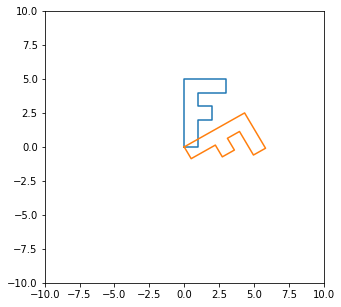

In [18]:
import matplotlib.pyplot as plt
import math
x = [point[0] for point in points]
y = [point[1] for point in points]
plt.figure(figsize=(5, 5))
plt.xlim((-10.0, 10.0))
plt.ylim(-10, 10)
plt.plot(x, y)


P = Matrix(points)
# T = Matrix([[2,0], [0, 1.5]])
# T = Matrix([[1, 0], [0, -1]])
# T = Matrix([[-1, 0], [0, -1]])
# T = Matrix([[-1, 0], [0, 1]])

# T = Matrix([[1, 1], [0, 1]])
# T = Matrix([[1, 0], [0.5, 1]])

theta = math.pi / 3

T = Matrix([[math.cos(theta), math.sin(theta)], 
            [-math.sin(theta), math.cos(theta)]])


P2 = T.dot(P.T())

plt.plot([P2.col_vector(i)[0] for i in range(P2.col_num())],
        [P2.col_vector(i)[1] for i in range(P2.col_num())])

plt.show()

In [7]:
points = [[1, 2]]
P = Matrix(points)
T = Matrix([[1, 2], 
            [3, 4]])

T.dot(P.T())

Matrix([[5], [11]])

Matrix([[0.9977786007011223, 0.066617294923393], [-0.066617294923393, 0.9977786007011223]])
Matrix([[460.0868387973304, 537.9035516749261, 536.8570055337817, 459.04029336376476], [-146.7828784652899, -146.81427874688734, -167.6922116493642, -167.66080076981376]])


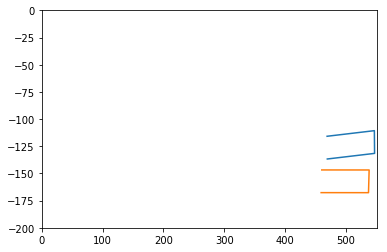

In [49]:
import matplotlib.pyplot as plt
import math
points = [[468.8430805206299, -115.80707445144654], 
          [546.4890232086182, -110.65446606874467], 
          [546.8356332778931, -131.5557388186455], 
          [469.1896905899048, -136.70833657979966]]
x = [point[0] for point in points]
y = [point[1] for point in points]
plt.xlim(0, 550)
plt.ylim(-200, 0)
P = Matrix(points)
plt.plot(x, y)

theta = 12 / 180

T = Matrix([[math.cos(theta), math.sin(theta)], 
            [-math.sin(theta), math.cos(theta)]])

T.dot(P.T())
P2 = T.dot(P.T())

print(T)
plt.plot([P2.col_vector(i)[0] for i in range(P2.col_num())],
        [P2.col_vector(i)[1] for i in range(P2.col_num())])

print(P2)
plt.show()
# matrix [0.9998886301079418  0.014924053767773473 -0.014924053767773473  0.9998886301079418]

In [55]:
(points[1][1] - points[0][1]) /(points[1][0] - points[0][0])

0.0663603042776757

In [57]:
math.atan(0.0663603042776757) * 180 / math.pi

3.7965988769338184

TypeError: 'int' object is not iterable